# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Откроем файл и выведем на экран первые 5 строк.
Путь к файлу в Яндекс.Практикум: /datasets/real_estate_data.csv

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Выведем на экран информацию о датафрейме

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Определим наличие дубликатов

In [3]:
df.duplicated().sum()

0

### Вывод
Датафрейм содержит 22 столбца и 23699 строк, данные содержат большое количество пропусков и не содержат явных дубликатов.


## Предобработка данных

### Изучение пропущенных значений

В столбце balcony содержаться пропущенные значения типа NaN, которые могли образоваться когда человек не указал количество балконов по причине их отсутствия, заменим их на ноль.

In [4]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в названии населенного пункта могли образоваться по техническим причинам при вызгрузке данных. Заменим их на unknown.

In [5]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Пропуски в столбце is_apartment могли образоваться по такой же причине как в balcony. Люди не указывают значение, если жилье не является апартаментами. Заменим пропущенные значения на False.

In [6]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Пропуски в столбце parks_around3000 заменим на 0. Скорее всего люди не указали значение, т.к. поблизости нет парка.

In [7]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

Пропуски в столбце ponds_around3000 также заменим на 0. Скорее всего люди не указали значение, т.к. поблизости нет пруда.

In [8]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Определим количество пропущенных значений в living_area и kitchen_area, а также посчитаем количество строк в которых одновременно отсутствуют эти два признака.

In [9]:
display(df['living_area'].isna().sum())
display(df['kitchen_area'].isna().sum())
df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['total_area'].count()

1903

2278

1464

Восстановим часть данных вычитая имеющееся значения из общей площади. После этого проверим результат.

In [10]:
df['living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])
display(df['living_area'].isna().sum())
display(df['kitchen_area'].isna().sum())
df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['total_area'].count()

1464

1464

1464

Пропуски в столбцах living_area, kitchen_area, floors_total вероятнее всего образовались по техническим причинам при выгрузке данных. Поскольку их доля составляет не более 8%, то можно произвести замену на среднее или медианное значение без существенного искажения данных. Найдем среднее и медианное значения.

In [11]:
print('Среднее значение living_area:', df['living_area'].mean())
print('Медианное значение living_area:', df['living_area'].median())
print('Среднее значение kitchen_area:', df['kitchen_area'].mean())
print('Медианное значение kitchen_area:', df['kitchen_area'].median())
print('Среднее значение floors_total:', df['floors_total'].mean())
print('Медианное значение floors_total:', df['floors_total'].median())

Среднее значение living_area: 34.90958810487969
Медианное значение living_area: 30.04
Среднее значение kitchen_area: 10.86496289601979
Медианное значение kitchen_area: 9.3
Среднее значение floors_total: 10.67382374115953
Медианное значение floors_total: 9.0


Полученные результаты показывают, что средние и медианные значения отличаются более чем на 10%. Поэтому пропуски лучше заменить на медианное значение.

In [12]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

Пропущенные значения в столбцах:
- ceiling_height
- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest
- days_exposition

Заменим на 0 в качестве маркерного значения, т.к. точно не известно как определить подходящее значение. Вначале посчитаем количество нулей в данных столбцах до замены.

In [13]:
columns_fillna = (
    ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 
     'ponds_nearest', 'days_exposition']
)
for item in columns_fillna:
    print('Количество нулевых значений в', item, 'равно', df[df[item] == 0][item].count())

Количество нулевых значений в ceiling_height равно 0
Количество нулевых значений в airports_nearest равно 1
Количество нулевых значений в cityCenters_nearest равно 0
Количество нулевых значений в parks_nearest равно 0
Количество нулевых значений в ponds_nearest равно 0
Количество нулевых значений в days_exposition равно 0


Можно видеть, что количество нулевых значений в датафрейме принебрежимо мало, поэтому можно заменить пропуски на 0 без потери значимой информации.

In [14]:
columns_fillna = (
    ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 
     'ponds_nearest', 'days_exposition']
)
for column in columns_fillna:
    df[column] = df[column].fillna(0)

Выведем информацию о датафрейме после замены пропусков.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

### Изменение типов данных

Изменим тип данных следующим образом:
- last_price, total_area, floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition заменим  float64 на int64, т.к. текущий тип данных имеет избыточную точность
- ceiling_height огруглим до одного знака после запятой и оставим float64
- first_day_exposition заменим object на datetime

In [16]:
columns_flt_to_int = (
['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 
 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
 'ponds_around3000', 'ponds_nearest', 'days_exposition']
)
try:
    for column2 in columns_flt_to_int:
        df[column2] = df[column2].astype('int')
except:
    display('Произошла ошибка, данные не могут быть заменены', column2)

In [17]:
df['ceiling_height'] = round(df['ceiling_height'], 1)

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Приведем значения в locality_name	к нижнему регистру

In [19]:
df['locality_name'] = df['locality_name'].str.lower()

Проверим наличие дубликатов после преобразования данных

In [20]:
df.duplicated().sum()

0

Выведем информацию о измененной таблице и ее первые 5 строк

In [21]:
df.dtypes

total_images                     int64
last_price                       int64
total_area                       int64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                      int64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                     int64
balcony                          int64
locality_name                   object
airports_nearest                 int64
cityCenters_nearest              int64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                  int64
dtype: object

In [22]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,25,0,санкт-петербург,18863,16028,1,482,2,755,0
1,7,3350000,40,2018-12-04,1,0.0,11,18,1,False,...,11,2,посёлок шушары,12817,18603,0,0,0,0,81
2,10,5196000,56,2015-08-20,2,0.0,5,34,4,False,...,8,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24,3,0.0,14,30,9,False,...,9,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,41,0,санкт-петербург,31856,8098,2,112,1,48,121


### Вывод
В результате предобработки данных были изучены пропущенные значения. Пропуски могли появиться по причине того, что люди оставляли значения признака пустым из-за его отсутствия или незнания, либо по техническим причинам при выгрузке данных. Часть из них была заменена на 0 или False как характерное значение, другие были заменены на ноль как маркерное значение. Пропуски в living_area, floors_total и kitchen_area заменены на медианное значение. Были изменены типы данных, практические все значения float заменены на int по причине избыточной точности. Значения в столбце ceiling_height округлены до десятых долей. Названия населенных пунктов приведены к нижнему регисту. Проведенные манипуляции показали, что в датафрейме отсутствуют дубликаты.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')
# прибавим еденицу чтобы отчет дней начинался с 1
df['last_price_day'] = df['first_day_exposition'].dt.weekday + 1
df['last_price_month'] = df['first_day_exposition'].dt.month
df['last_price_year'] = df['first_day_exposition'].dt.year
df['living_to_total_area_ratio'] = round(df['living_area'] / df['total_area'], 1)
df['kitchen_to_total_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 1)

Добавим категорию, отражающую этажность квартиры:
- значения категории — первый, последний, другой.

In [24]:
# создадим функцию, присваювающую категорию
def floor_category_func(df):
    floors_total = df['floors_total']
    floor = df['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
# применим функцию
df['floor_category'] = df.apply(floor_category_func, axis=1)
# проверим результат
df['floor_category'].value_counts()

другой       17441
последний     3341
первый        2917
Name: floor_category, dtype: int64

Выведем первые пять строк измененного датафрейма.

In [25]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,last_price_day,last_price_month,last_price_year,living_to_total_area_ratio,kitchen_to_total_area_ratio,floor_category
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,2,755,0,120370,4,3,2019,0.5,0.2,другой
1,7,3350000,40,2018-12-04,1,0.0,11,18,1,False,...,0,0,81,83750,2,12,2018,0.4,0.3,первый
2,10,5196000,56,2015-08-20,2,0.0,5,34,4,False,...,2,574,558,92785,4,8,2015,0.6,0.1,другой
3,0,64900000,159,2015-07-24,3,0.0,14,30,9,False,...,3,234,424,408176,5,7,2015,0.2,0.1,другой
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,1,48,121,100000,2,6,2018,0.3,0.4,другой


### Вывод
Проведены расчеты цены квадратного метра недвижимости, отношения жилой площади и площади кухни к общей площади. Добавлена категория этажности квартиры, а также день недели, месяц и год публикации объявления.

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков
- Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

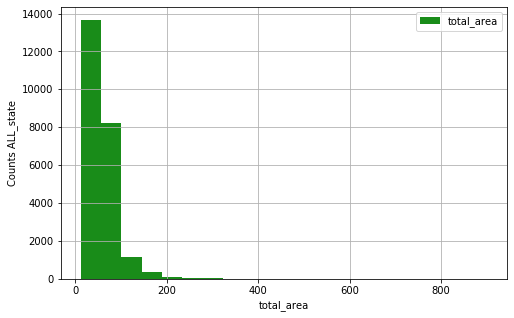

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

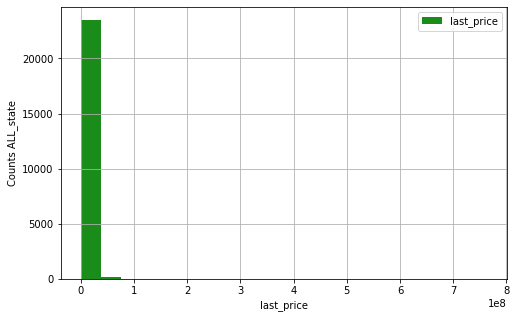

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

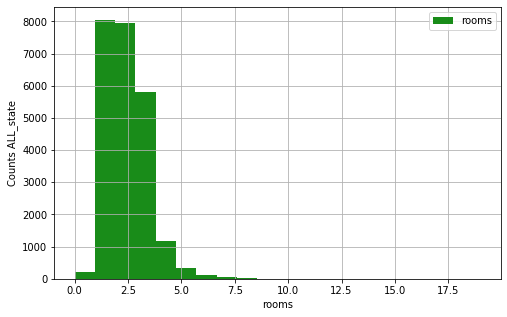

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [26]:
import matplotlib.pyplot as plt

analizing_options_list = ['total_area', 'last_price', 'rooms']
for analizing_option in analizing_options_list:
    df.plot(kind='hist', y=analizing_option, histtype='bar', 
          bins=20, linewidth=1, alpha=0.9, label=analizing_option, 
          grid=True, legend=True, color='green', figsize=(8, 5))
    plt.xlabel(analizing_option)
    plt.ylabel('Counts ALL_state')
    plt.show()
    display(df[analizing_option].describe())

Построим гистограмму высоты потолков, не включая нулевые маркеры отсутствующих значений.

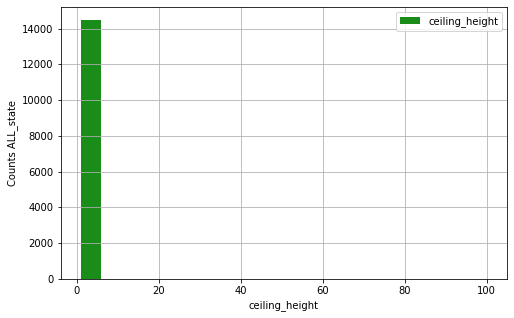

count    14504.000000
mean         2.775717
std          1.260951
min          1.000000
25%          2.500000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [27]:
df.query('ceiling_height != 0').plot(kind='hist', y='ceiling_height', histtype='bar', 
        bins=20, linewidth=1, alpha=0.9, label='ceiling_height', 
        grid=True, legend=True, color='green', figsize=(8, 5))
plt.xlabel('ceiling_height')
plt.ylabel('Counts ALL_state')
plt.show()

display(df.query('ceiling_height != 0')['ceiling_height'].describe())

Результаты показвают, что большинство квартир имеют площадь до 70 $м^2$, цену до 7 000 000, количество комнат до 3 и высоту потолков до 2,7 м. Максимальные значения площади, цены, количества комнат и высоты потолков 900 $м^2$, 800 000 000, 19 и 100 м, соответствено. А минимальные - 12 $м^2$, 12 000, 0 и 1 м, соответственно. Можно заметить, что распределения признаков больше походят на распределение Пуассона. Также можно отметить, что высота потолков имеет нереалистично высокие значения 100 м, а количество комнат может принимать нулевое значение, вероятно, данные значения являются выбросами. Необходимо, отметить, что в столбце ceiling_height (высота потолков) нули являются маркерами отсутствующих значений.

### Исследование количества времени для продажи квартиры
- Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

В столбце days_exposition нули являются маркерами пропущенных значений, построим график не включая их.

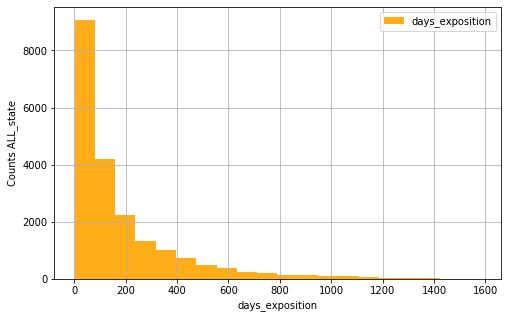

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
df.query('days_exposition != 0').plot(kind='hist', y='days_exposition', histtype='bar', 
        bins=20, linewidth=1, alpha=0.9, label='days_exposition', 
        grid=True, legend=True, color='orange', figsize=(8, 5))
plt.xlabel('days_exposition')
plt.ylabel('Counts ALL_state')
plt.show()

display(df.query('days_exposition != 0')['days_exposition'].describe())

Результаты показывают, что среднее время продажи квартиры составляет 180 дней, а половина квартир из датафрейма была продана быстрее 95 дней. Судя по гисторамме, можно сказать, что продажа быстрее 45 дней является быстрой, о дольше 232 дней долгой. 

### Анализ редких и выбивающихся значений
- Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Проанализируем площадь, цену, число комнат, высоту потолков, время продажи на наличие выбивающихся значений. Не будем учитывать нулевые значения.

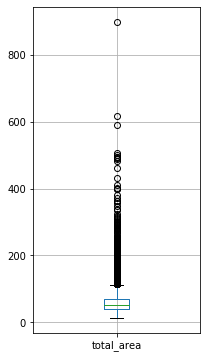

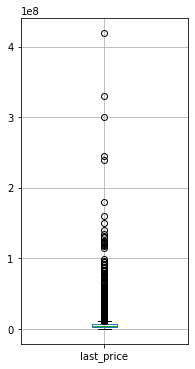

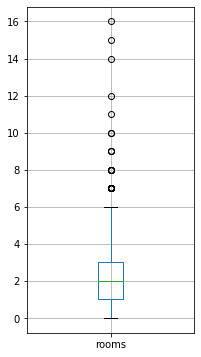

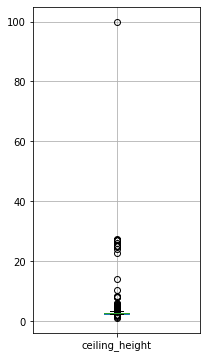

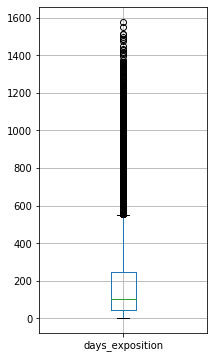

In [29]:
analizing_options_list2 = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

for option in analizing_options_list2:
    df.query('days_exposition != 0 and ceiling_height != 0').boxplot(column=option, figsize=(3, 6))
    plt.show()

По диаграммам можно видеть, что данные содержат большое число редких и выбивающихся значений (обозначены точками), не вписывающихся в промежуток значений, заданных усами графика. Все диаграммы имеют выбросы выше верхней границы усов, а на диаграмме ceiling_height также присутствуют выбросы ниже нижней границы.

Определим границы выбросов по следующей формуле: нижняя граница - $Q1 - 1.5*IQR$, верхняя граница - $Q3 + 1.5*IQR$, где $IQR = Q3 - Q1$ — интерквартильный размах.

In [30]:
import statistics

analizing_options_list2 = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for option2 in analizing_options_list2:
    iqr1 = (df.query('days_exposition != 0 and ceiling_height != 0')[option2].quantile(0.75) -
            df.query('days_exposition != 0 and ceiling_height != 0')[option2].quantile(0.25))
    print('Верхняя граница выбросов', option2 + ':',
          round(df.query('days_exposition != 0 and ceiling_height != 0')[option2].quantile(0.75) +
          1.5 * iqr1, 1))

iqr2 = (df.query('days_exposition != 0 and ceiling_height != 0')['ceiling_height'].quantile(0.75) -
        df.query('days_exposition != 0 and ceiling_height != 0')['ceiling_height'].quantile(0.25))
print('Нижняя граница выбросов', 'ceiling_height' + ':',
      round(df.query('days_exposition != 0 and ceiling_height != 0')['ceiling_height'].quantile(0.25) -
      1.5 * iqr2, 1))

Верхняя граница выбросов total_area: 112.5
Верхняя граница выбросов last_price: 11500000.0
Верхняя граница выбросов rooms: 6.0
Верхняя граница выбросов ceiling_height: 3.2
Верхняя граница выбросов days_exposition: 552.5
Нижняя граница выбросов ceiling_height: 2.1


Заменим выбивающиеся значения на нулевые (маркерные) значения.

In [31]:
df['total_area'] = df['total_area'].where(df['total_area'] <= 113, 0)
df['last_price'] = df['last_price'].where(df['last_price'] <= 11500000, 0)
df['rooms'] = df['rooms'].where(df['rooms'] <= 6, 0)
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 3.2, 0)
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] >= 2.1, 0)
df['days_exposition'] = df['days_exposition'].where(df['days_exposition'] <= 553, 0)

### Исследование факторов, влияющих на стоимость квартиры
- Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Для обзора взаимосвязи исследуемых данных, построим таблицу коэффициентов корреляции Пирсона между всеми парами столбцов.

In [32]:
(
df.query('last_price != 0 and total_area != 0 and rooms != 0 and \
          cityCenters_nearest != 0 and last_price_day != 0 and \
          last_price_month != 0 and last_price_year != 0')
          .loc[:, ['last_price','total_area', 'rooms', 'cityCenters_nearest', 
          'floor_category', 'last_price_day', 'last_price_month', 
          'last_price_year']].corr()
)

,last_price,total_area,rooms,cityCenters_nearest,last_price_day,last_price_month,last_price_year
last_price,1.000000,0.772632,0.498073,-0.345765,-0.007636,0.000212,0.029948
total_area,0.772632,1.000000,0.796026,-0.120469,-0.005484,0.005784,-0.065031
rooms,0.498073,0.796026,1.000000,-0.071836,-0.002612,0.001213,-0.033062
cityCenters_nearest,-0.345765,-0.120469,-0.071836,1.000000,0.006532,-0.015000,0.015333
last_price_day,-0.007636,-0.005484,-0.002612,0.006532,1.000000,0.004079,-0.004261
last_price_month,0.000212,0.005784,0.001213,-0.015000,0.004079,1.000000,-0.266938
last_price_year,0.029948,-0.065031,-0.033062,0.015333,-0.004261,-0.266938,1.000000


Из коэффициентов корреляции можно видеть, что цена продажи сильнее всего зависит от площади квартиры, слабее зависит от числа комнат, практически не зависит от даты продажи, а также имеет отрицательную корреляцию с расстоянием до центра.

Построим парные диаграммы рассеяния для зависимости last_price от total_area, cityCenters_nearest, rooms, last_price_day, last_price_month, last_price_year. Будем исключать из расчетов нулевые значения.

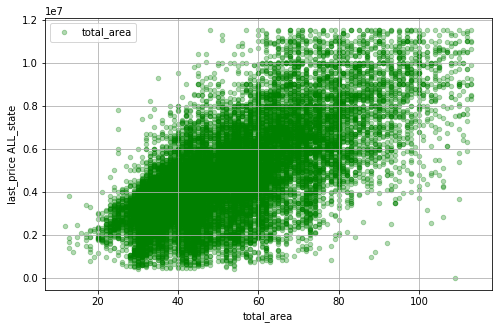

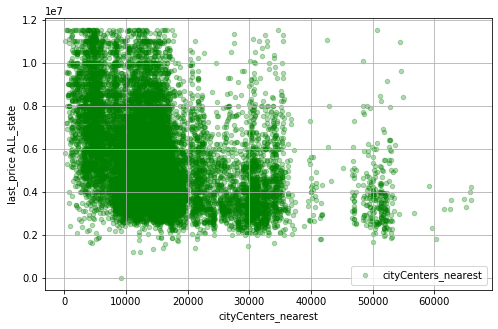

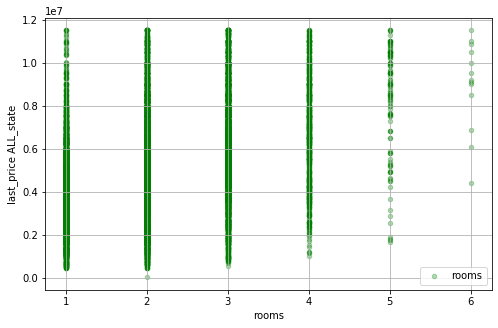

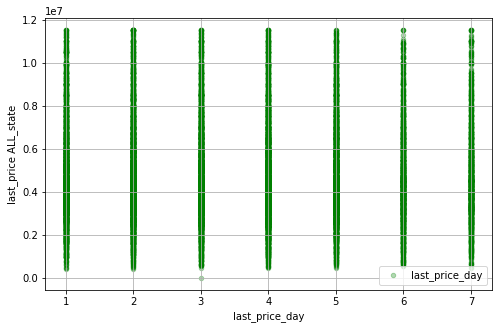

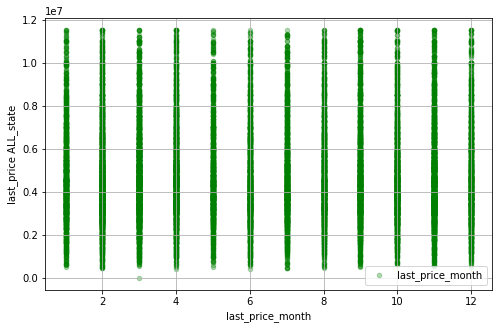

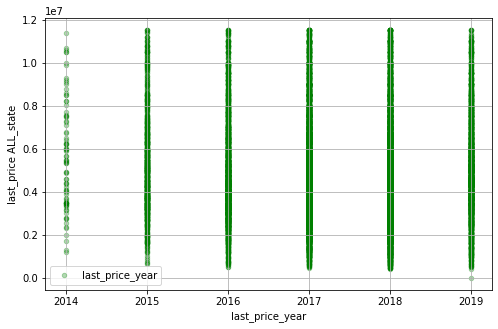

In [33]:
analizing_options_list3 = ['total_area', 'cityCenters_nearest', 'rooms', \
                           'last_price_day', 'last_price_month', 'last_price_year']
for option3 in analizing_options_list3:
    (
    df[(df['last_price'] != 0) & (df[option3] != 0)]
    .plot(x=option3, y='last_price', kind='scatter', alpha=0.3, label=option3, 
    grid=True, legend=True, color='green', figsize=(8, 5))
    )
    plt.ylabel('last_price ALL_state')
    plt.show()

Диаграммы рассеяния показывают цена продажи увеличивается с ростом общей площади квартиры и уменьшается с удалением от центра города, причем наиболее интенсивно начиная примерно с 15 000 м. Интересно отметить, что заметен рост цены квартир при увеличении числа комнат больше четырех (при количестве комнат не более 4 зависимость не ясна). Зависимость цены от момента продажи (день, месяц, год) на диаграммах рассеяния не видна.

Для получения дополнительной информации построим ячеечные диаграммы для зависимости last_price от total_area и cityCenters_nearest. Кроме этого построим графики зависимости средней цены от количества комнат и момента продажи.

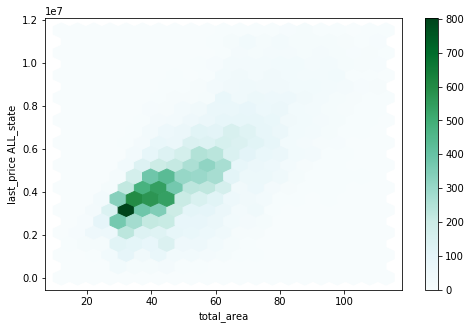

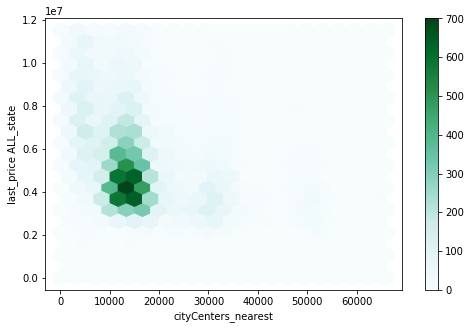

In [34]:
analizing_options_list4 = ['total_area', 'cityCenters_nearest']
for option4 in analizing_options_list4:
    (
    df[(df['last_price'] != 0) & (df[option4] != 0)]
    .plot(x=option4, y='last_price', kind='hexbin', gridsize=20, sharex=False, 
    label=option4, figsize=(8, 5))
    )
    plt.ylabel('last_price ALL_state')
    plt.show()

Ячеистая диаграмма подтверждает наличие положительной корреляции между ценой продажи и площадью квартиры. Наличие отрицательной корреляции между ценой и расстоянием до центра также подтверждается, но из-за того, что основное предложение сосредоточено в диапазоне 8000 - 20000 м она слабо выражена.  

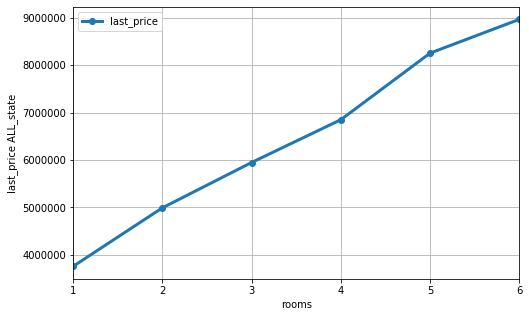

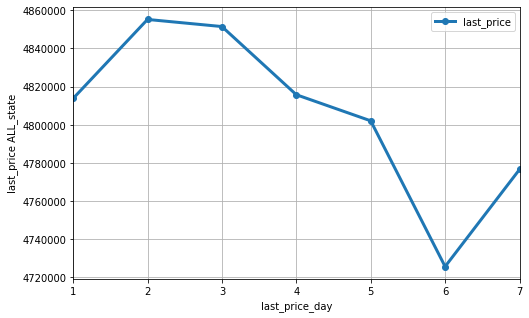

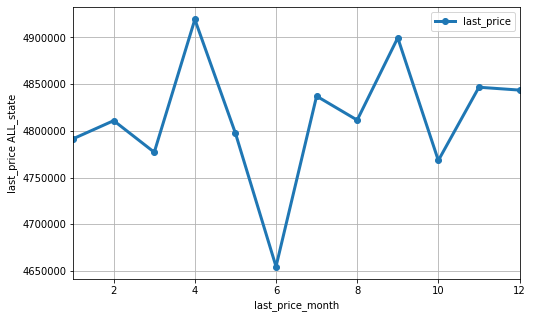

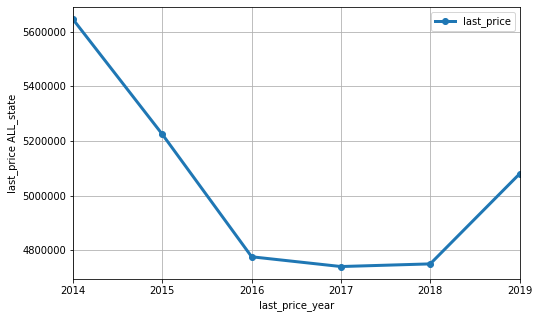

In [35]:
analizing_options_list5 = ['rooms', 'last_price_day', 'last_price_month', 'last_price_year']
for option5 in analizing_options_list5:
    ( 
    df[(df['last_price'] != 0) & (df[option5] != 0)]
    .pivot_table(index=option5, values='last_price', aggfunc='mean')
    .plot(style='o-', figsize=(8, 5), linewidth=3, grid=True)
    )
    plt.ylabel('last_price ALL_state')
    plt.show()

Графики зависимости средней цены продажи от числа комнат, и момента продажи позволили выявить закономерности, которые не были видны на диаграммах рассеяния. Графики показывают, что происходит линейный рост средней цены от количества комнат. Кроме этого, цена может периодически меняться от недели к неделе, т.е. снижается к выходным дням и выростает к середине недели (возможно, что люди охотно торгуются и снижают цену в выходные дни). Средняя цена зависит от месяца: снижается летом (имеет минимум в июне) и повышается весной и осенью (имеет два локальных максимума в апреле и сентябре). Также удалось установить снижение цен с 2014 по 2016 (вероятно вызвано экономическим кризисом), выход цены на плато (продолжалось до 2018) и рост с 2018 по 2019 гг.

### Анализ десяти населённых пунктов с наибольшим числом объявлений
- Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Выведем на экран 10 населенных пунктов с наибольшим числом объявлений.

In [36]:
df['locality_name'].value_counts().head(10)

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

Посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [37]:
locality_name_top10_list = (
 ['санкт-петербург', 'посёлок мурино', 'посёлок шушары', 'всеволожск',
  'пушкин', 'колпино', 'посёлок парголово', 'гатчина', 'деревня кудрово', 'выборг']
 )
(
df.query('locality_name in @locality_name_top10_list and price_per_square_meter != 0')
.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean'])
.sort_values(by=[('mean', 'price_per_square_meter')], ascending=False)
 )

,mean
,price_per_square_meter
locality_name,
санкт-петербург,115347.299472
пушкин,103610.948509
деревня кудрово,93001.742475
посёлок парголово,90675.235474
посёлок мурино,86379.549808
посёлок шушары,79068.186364
колпино,75735.150888
гатчина,69045.068404


Как можно видеть, наибольшая средняя цена квадратного метра жилья в Санкт-Петербурге и Пушкине, а наименьшая во Всеволожске и Выборге.

### Анализ изменения цены по степени удалённости от центра
- Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

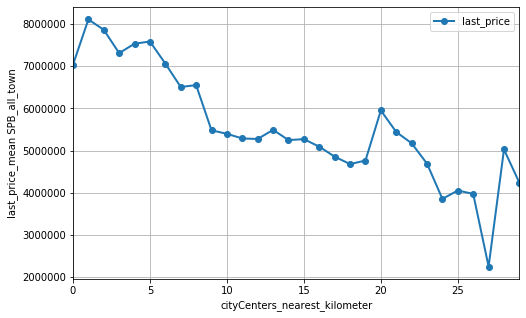

In [38]:
df['cityCenters_nearest_kilometer'] = (round(df['cityCenters_nearest'] / 1000, 0)).astype('int')
(
df.query('locality_name == "санкт-петербург" and last_price != 0')
.pivot_table(index='cityCenters_nearest_kilometer', values='last_price', aggfunc='mean')
.plot(style='o-', figsize=(8, 5), linewidth=2, grid=True)
)
plt.ylabel('last_price_mean SPB_all_town')
plt.show()

График зависимости средней цены от удаленности от центра показывает,что начиная с 9 километра цена резко снижается. Можно сказать что центральная зона Санкт-Петербурга находится в этих пределах (до 8 километров включительно).

### Сравнение выводов по квартирам в центре и общих выводов по всему городу
- Выделиим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Сравним площади, цену, число комнат и высоту потолков в центре города и по всему городу. Для этого построим гистограммы этих признаков.

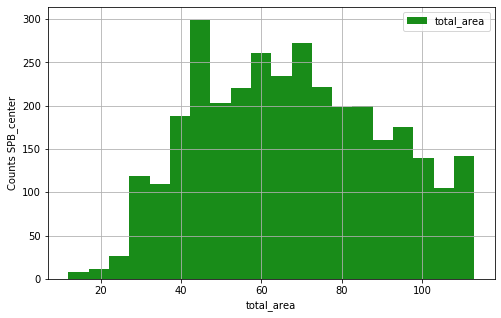

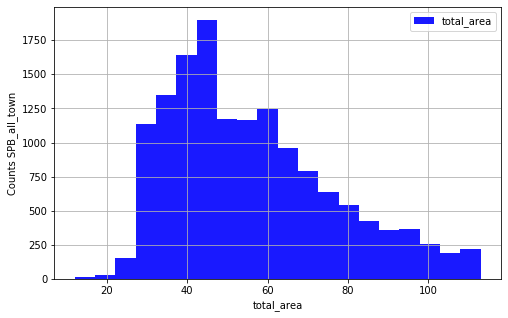

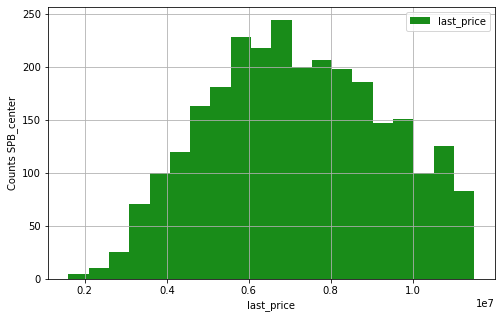

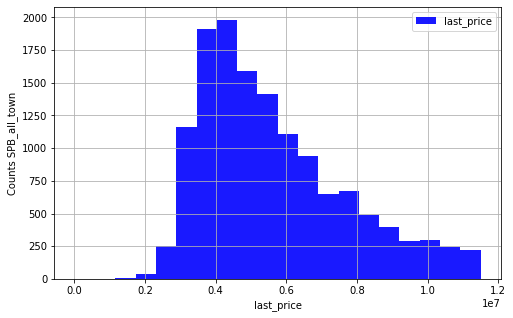

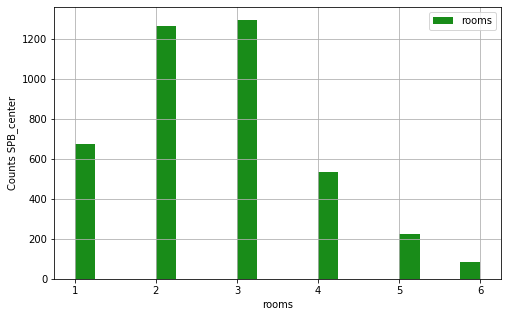

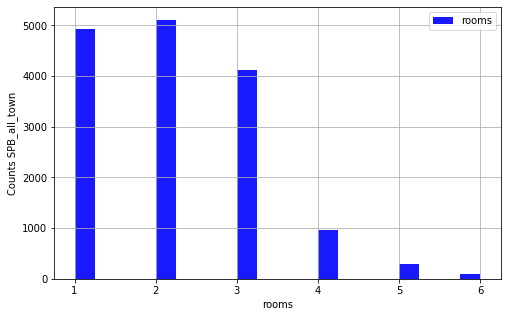

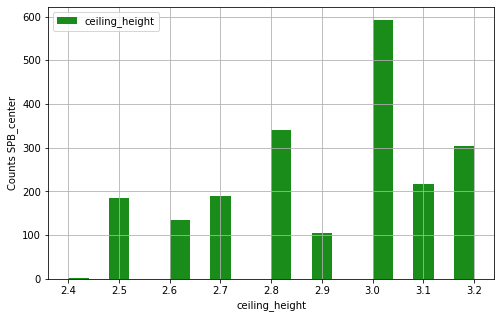

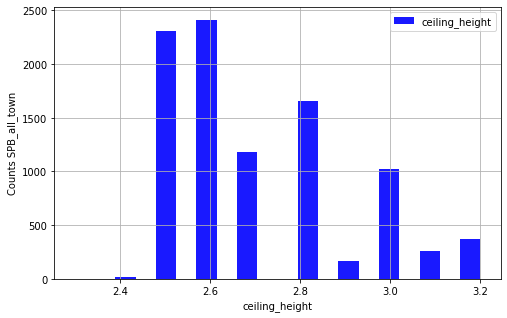

In [39]:
analizing_options_list6 = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for option6 in analizing_options_list6:
    (
    df[(df['locality_name'] == 'санкт-петербург') & (df['cityCenters_nearest_kilometer'] < 9) & (df[option6] != 0)]
    .plot(kind='hist', y=option6, histtype='bar', bins=20, linewidth=1, 
    alpha=0.9, label=option6, grid=True, legend=True, color='green', figsize=(8, 5))
    )
    plt.ylabel('Counts SPB_center')
    plt.xlabel(option6)
    plt.show()
    (
    df[(df['locality_name'] == 'санкт-петербург') & (df[option6] != 0)]
    .plot(kind='hist', y=option6, histtype='bar', bins=20, linewidth=1, 
    alpha=0.9, label=option6, grid=True, legend=True, color='blue', figsize=(8, 5))
    )
    plt.ylabel('Counts SPB_all_town')
    plt.xlabel(option6)
    plt.show()

Можно видеть, что распределение площади квартир в центре города и в среденем по городу отличачаются. Площадь квартир в центре больше подчиняется нормальному распределению и имеет максимум в районе 60 $ м^2 $, а площадь квартир в целом по городу подчиняется распределению Пуассона с максимомм в области 40 $ м^2 $. Кроме этого, в центре наблюдается большая доля квартир с площадью выше 80 $ м^2 $. Пик распределения для цены квартир в центре сдвинут вправо относительно пика распределения для квартир в целом по городу. Это говорит, что в центре больше предложения квартир с большей стоимостью. Как и распределение площади, распределение цен в центре больше походит на нормальное распределение, а распределение в среднем по городу подчиняется распределению Пуассона. Интересно отметить, что в центре города больше предложений 2 и 3 комнатных квартир и квартир с потолками выше 3 м в отличие от средних показателей по городу.

Оценим факторы, которые влияют на стоимость квартиры (площадь, число комнат, этаж, удалённость от центра, дата размещения объявления). Для этого как и ранее (для всей области) построим диаграммы рассеяния для пощади и удаленности от центра, а также графики зависимости средней цены от числа комнат и даты размещения. 

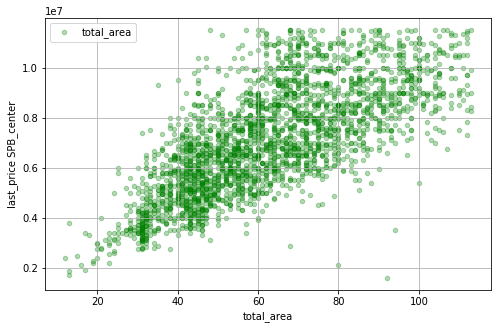

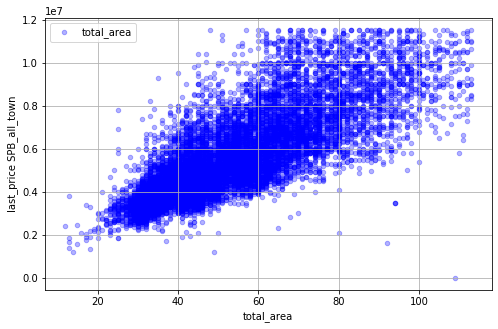

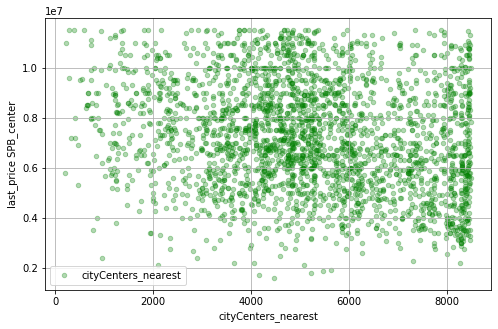

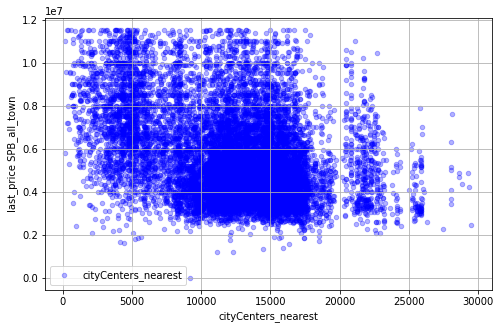

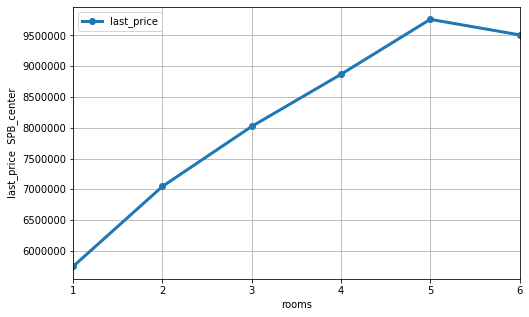

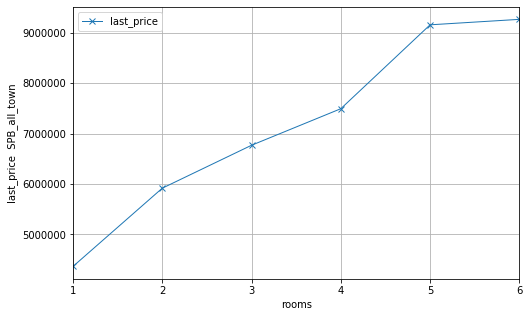

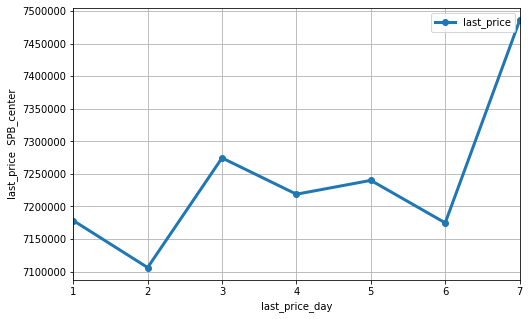

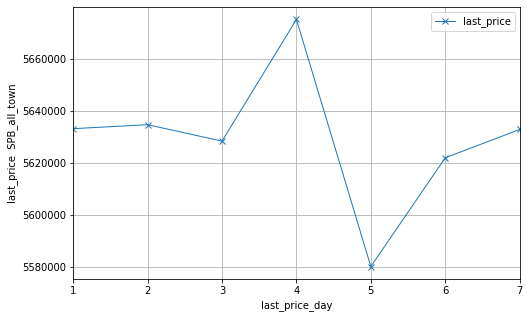

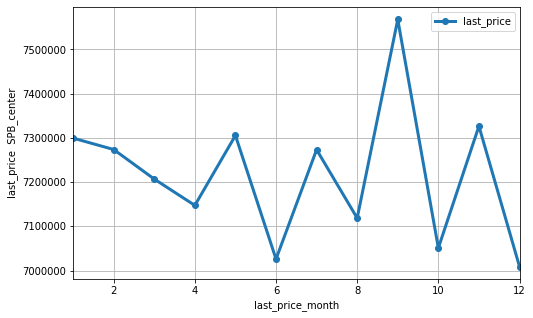

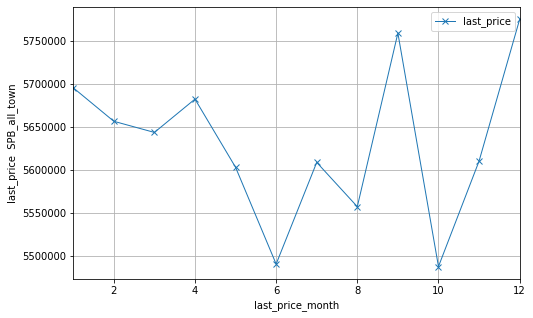

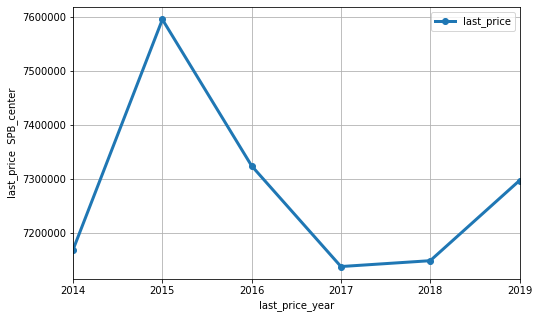

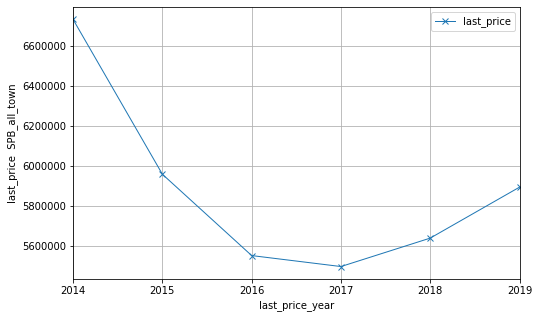

In [40]:
analizing_options_list7 = ['total_area', 'cityCenters_nearest']
for option7 in analizing_options_list7:
    (
    df[(df['last_price'] != 0) & (df['locality_name'] == 'санкт-петербург') & 
       (df['cityCenters_nearest_kilometer'] < 9) & (df[option7] != 0)]
    .plot(x=option7, y='last_price', kind='scatter', alpha=0.3, label=option7, 
    grid=True, legend=True, color='green', figsize=(8, 5))
    )
    plt.ylabel('last_price SPB_center')
    plt.show()
    (
    df[(df['last_price'] != 0) & (df['locality_name'] == 'санкт-петербург') & (df[option7] != 0)]
    .plot(x=option7, y='last_price', kind='scatter', alpha=0.3, label=option7, 
    grid=True, legend=True, color='blue', figsize=(8, 5))
    )
    plt.ylabel('last_price SPB_all_town')
    plt.show()


analizing_options_list8 = ['rooms', 'last_price_day', 'last_price_month', 'last_price_year']
for option8 in analizing_options_list8:
    ( 
    df[(df['last_price'] != 0) & (df['locality_name'] == 'санкт-петербург') & 
       (df['cityCenters_nearest_kilometer'] < 9) & (df[option8] != 0)]
    .pivot_table(index=option8, values='last_price', aggfunc='mean')
    .plot(style='o-', figsize=(8, 5), linewidth=3, grid=True)
    )
    plt.ylabel('last_price  SPB_center')
    plt.show()
    ( 
    df[(df['last_price'] != 0) & (df['locality_name'] == 'санкт-петербург') & (df[option8] != 0)]
    .pivot_table(index=option8, values='last_price', aggfunc='mean')
    .plot(style='x-', figsize=(8, 5), linewidth=1, grid=True)
    )
    plt.ylabel('last_price  SPB_all_town')
    plt.show()

Диаграммы рассеяния цена - площадь, цена - расстояние до центра в целом схожи для центральной части и для всего города, однако диаграммы для центральной части города расположены выше и основной объем данных начинается с 4 000 000, что говорит о более высокой цене недвижимости в центральной части. Зависимости цены от количества комнат ведут себя схожим образом, но цена для квартир в центре имеет большие значения. Зависимость цены от дня недели для города в целом походит на аналогичную зависимость для всей области (повышение в середине недели и снижение к выходным), а данная зависимость для центра города выглядит по-другому. Наблюдается рост к выходным дням. Зависимости цены от месяца продажи выглядяд схожим образом, но отличаются от зависимости для всей области. Наличие минимума летом и максимумов весной и осенью на них менее выражены. Зависимости цены от года продажи в целом схожи и соответствуют таковому для распределения по всей области за исключением того, что снижение цены в центральной области имело более краткосрочный характер.

## Общий вывод

В работе проведен анализ объявлений о продаже квартир в Ленинградской области и Санкт-Петербурге, проведена предобработка данных и их исследовательский анализ. 

Показано:
- в среднем по области большинство квартир имеют площадь до 70 $м^2$, цену до 7 000 000, количество комнат до 3 и высоту потолков до 2,7 м. Распределение данных признаков в большей степени соответствует распределению Пуассона;
- среднее время продажи квартиры составляет 180 дней, а половина квартир из датафрейма была продана быстрее 95 дней;
- цена продажи имеет наибольшую корреляцию с площадью квартиры и ее расстоянием до центра;
- средняя цена квартир снижается летом и повышается в межсезонье; 
- обнаружено снижение цен с 2014 по 2016 (вероятно вызвано экономическим кризисом), выход цены на плато (продолжалось до 2018) и рост с 2018 по 2019 гг;
- наибольшая средняя цена квадратного метра жилья наблюдаетс в Санкт-Петербурге и Пушкине, а наименьшая во Всеволожске и Выборге;
- центральная зона Санкт-Петербурга находится на удалении 8 км от центра;
- распределение площади квартир в центре города и в среденем по городу отличачаются. Площадь квартир в центре больше подчиняется нормальному распределению и имеет максимум в районе 60  $м^2$ , а площадь квартир в целом по городу подчиняется распределению Пуассона с максимумом в области 40  $м^2$ . Пик распределения для цены квартир в центре сдвинут вправо относительно пика распределения для квартир в целом по городу. Это говорит, что в центре больше предложения квартир с большей стоимостью и площадью.